# PART- 3 `( Handling With Outliers )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import scipy.stats

import warnings
warnings.filterwarnings("ignore")  # to suppress all warnings

In [2]:
df0=pd.read_csv('df1_no_missing_val.csv')
df0.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
price,16950,80900,69900,46990,16800
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
doors,5,4,5,5,5
warranty,2,2,1,1,1
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
first_registration,2016-06-01,2022-06-01,2020-07-01,2020-01-01,2015-09-01


In [3]:
df=df0.copy()

In [4]:
df.columns

Index(['Unnamed: 0', 'make_model', 'make', 'price', 'body_type', 'type',
       'doors', 'warranty', 'mileage', 'first_registration', 'gearbox',
       'fuel_type', 'colour', 'paint', 'seller', 'seats', 'power',
       'engine_size', 'co_emissions', 'drivetrain', 'fuel_consumption',
       'comfort_convenience', 'entertainment_media', 'safety_security',
       'extras', 'general_inspection', 'last_service', 'full_service_history',
       'non_smoker_vehicle', 'emission_class', 'upholstery', 'previous_owner',
       'taxi_or_rental_car', 'country', 'age', 'comfort_convenience_n',
       'safety_security_n', 'entertainment_media_n', 'extras_n'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [506]:
df.shape

(28630, 38)

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             28630 non-null  object 
 1   make                   28630 non-null  object 
 2   price                  28630 non-null  int64  
 3   body_type              28630 non-null  object 
 4   type                   28630 non-null  object 
 5   doors                  28630 non-null  int64  
 6   warranty               28630 non-null  int64  
 7   mileage                28630 non-null  float64
 8   first_registration     28628 non-null  object 
 9   gearbox                28630 non-null  object 
 10  fuel_type              28630 non-null  object 
 11  colour                 28630 non-null  object 
 12  paint                  28630 non-null  object 
 13  seller                 28630 non-null  object 
 14  seats                  28630 non-null  int64  
 15  po

In [6]:
df["first_registration"] = pd.to_datetime(df["first_registration"])

In [7]:
df["first_registration"].dtype

dtype('<M8[ns]')

In [8]:
correlation = df['first_registration'].corr(df['age'])
print("Correlation coefficient between 'first_registration' and 'age':", correlation)


Correlation coefficient between 'first_registration' and 'age': -0.9494079834577595


there is a strong correlation between age and first_registration, so we can drop frist_registration column.

In [9]:
df.drop('first_registration', axis=1, inplace=True)

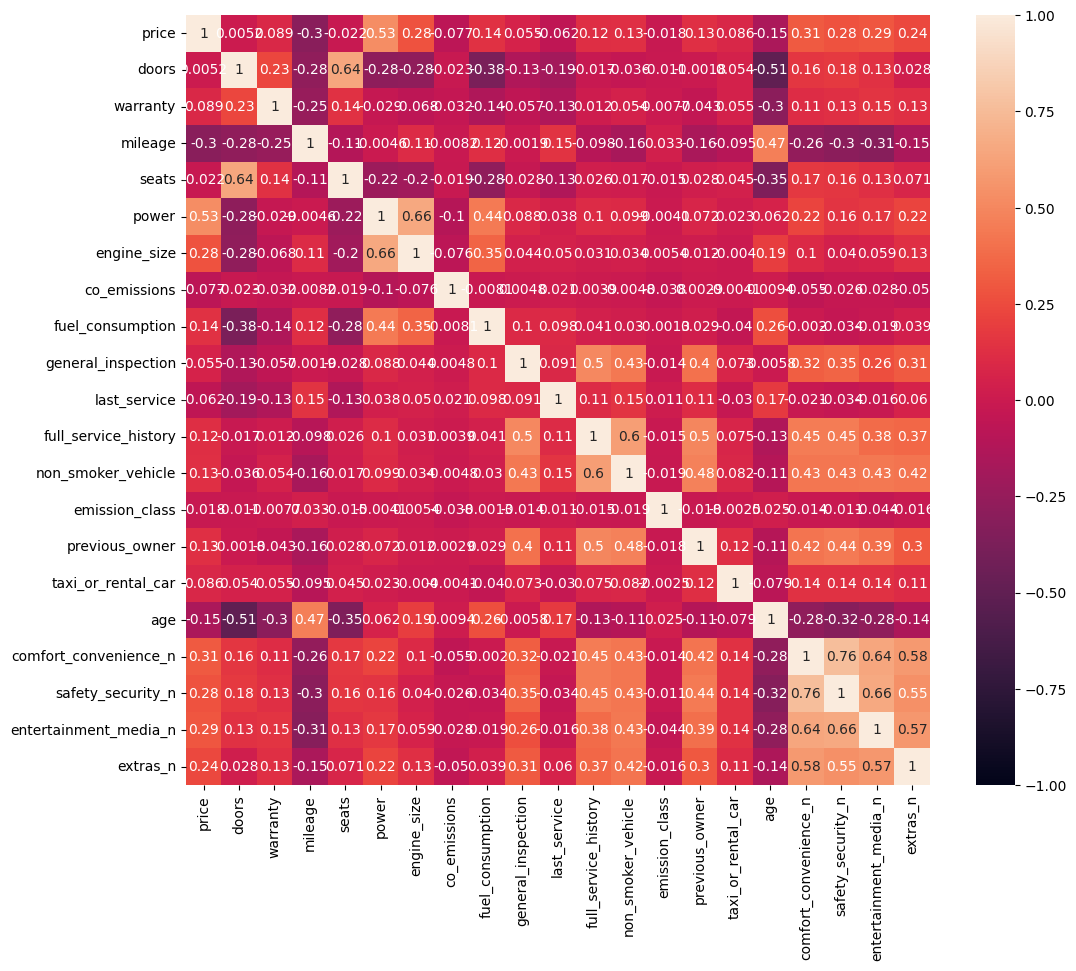

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1);

# Price

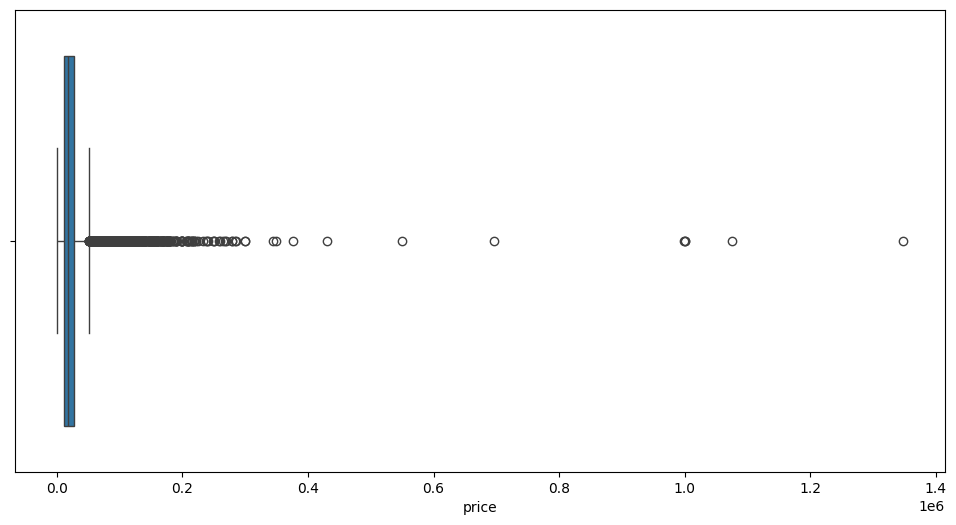

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['price']);

In [12]:
np.log(df.price)

0         9.738023
1        11.300969
2        11.154821
3        10.757690
4         9.729134
           ...    
28625    10.534759
28626     8.612322
28627     8.895630
28628    10.305614
28629     8.398410
Name: price, Length: 28630, dtype: float64

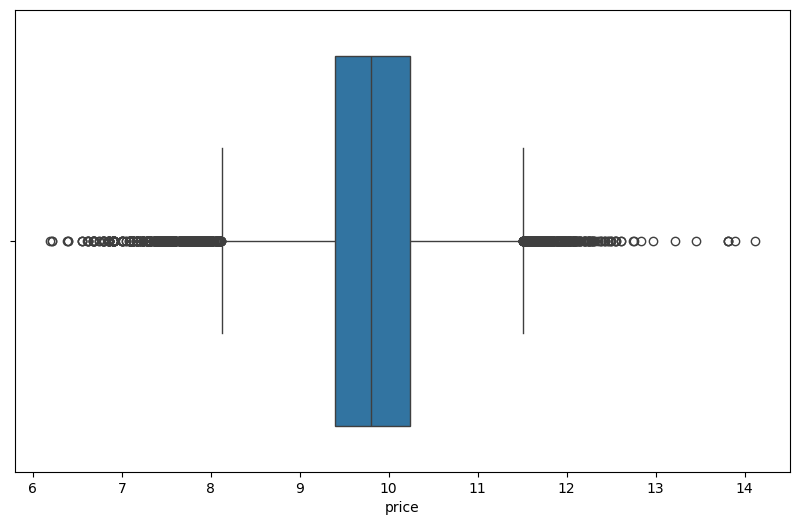

In [13]:
plt.figure(figsize=(10, 6))

sns.boxplot(x = np.log(df.price)); 

In [14]:
round(df['price'].describe(),2)

count      28630.00
mean       23555.20
std        25953.71
min          490.00
25%        11990.00
50%        17980.00
75%        27990.00
max      1346900.00
Name: price, dtype: float64

In [15]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)

IQR = Q3 - Q1
IQR

16000.0

In [518]:
#lower_lim = Q1 - 2 * IQR
#upper_lim = Q3 + 2 * IQR  

#lower_lim, upper_lim

In [16]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR  

lower_lim, upper_lim

(-12010.0, 51990.0)

Average car price in Europe is around 50K.
We reviewed 2IQR and 1.5 IQR values and decided that 1.5 IQR is matching with the average car price in Europe.

In [17]:
no_outliers = (df['price'] <= upper_lim) & (df['price'] >= lower_lim)

In [18]:
df = df[no_outliers]

In [19]:
df.shape

(26720, 37)

In [20]:
df['type'].value_counts(dropna=False)

type
Used              24013
Pre-registered     1248
Demonstration      1029
Employee's car      430
Name: count, dtype: int64

# Doors

In [21]:
df['doors'].value_counts(dropna=False)

doors
5    16818
2     5079
4     2635
3     2181
6        5
1        2
Name: count, dtype: int64

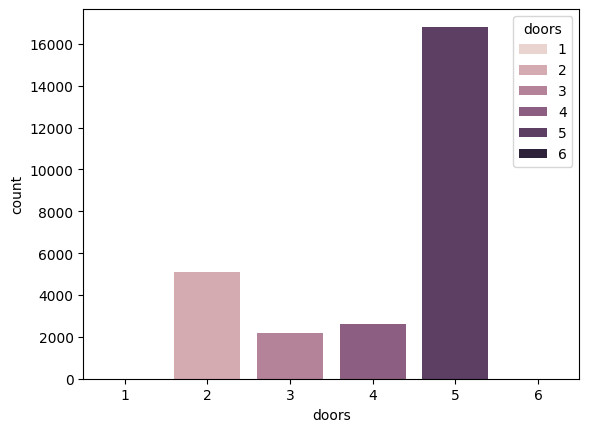

In [525]:
sns.countplot(data=df, x="doors", hue='doors');


In [526]:
df.loc[df['doors']==1]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
10001,Fiat 124 Spider,Fiat,19000,Convertible,Used,1,0,48500.0,Manual,benzine,...,6,Leather,0,0,IT,55.0,2,2,2,1
21140,Ford Fiesta,Ford,11790,Compact,Used,1,3,14600.0,Manual,benzine,...,6,Cloth,1,0,AT,5.0,1,2,1,1


In [527]:
df.loc[10001, 'doors'] = 2 # fiat 124 Spider 2 kapili oldugu icin 


In [528]:
df.loc[10001, 'doors']

2

In [529]:
df.loc[21140, 'doors'] = 5 #  Ford Fiesta Compact 5 kapili oldugu icin

In [530]:
df.loc[21140, 'doors']

5

In [531]:
df.loc[df['doors']==6]   

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
15931,Dacia Logan,Dacia,2700,Station wagon,Used,6,0,210877.0,Manual,diesel,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16097,Dacia Logan,Dacia,1700,Station wagon,Used,6,0,144043.0,Manual,benzine,...,6,Cloth,0,0,BE,14.0,1,1,1,2
16105,Dacia Dokker,Dacia,16900,Station wagon,Used,6,2,90.0,Manual,LPG,...,6,Cloth,0,0,BE,0.0,1,1,2,1
16129,Dacia Logan,Dacia,3000,Station wagon,Used,6,0,258000.0,Manual,diesel,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16163,Dacia Logan,Dacia,5950,Station wagon,Used,6,0,173000.0,Manual,diesel,...,6,Cloth,1,0,BE,10.0,1,1,1,1


In [532]:
df.loc[[15931,16097,16105,16129,16163], 'doors']=5

In [533]:
df.loc[[15931,16097,16105,16129,16163]]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
15931,Dacia Logan,Dacia,2700,Station wagon,Used,5,0,210877.0,Manual,diesel,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16097,Dacia Logan,Dacia,1700,Station wagon,Used,5,0,144043.0,Manual,benzine,...,6,Cloth,0,0,BE,14.0,1,1,1,2
16105,Dacia Dokker,Dacia,16900,Station wagon,Used,5,2,90.0,Manual,LPG,...,6,Cloth,0,0,BE,0.0,1,1,2,1
16129,Dacia Logan,Dacia,3000,Station wagon,Used,5,0,258000.0,Manual,diesel,...,6,Cloth,1,0,BE,12.0,1,1,1,1
16163,Dacia Logan,Dacia,5950,Station wagon,Used,5,0,173000.0,Manual,diesel,...,6,Cloth,1,0,BE,10.0,1,1,1,1


# Mileage

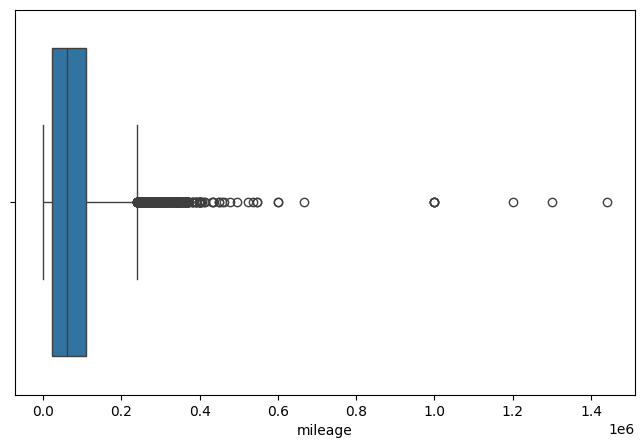

In [534]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['mileage']);

In [535]:
round(df['mileage'].describe(),2)

count      26720.00
mean       75904.09
std        67995.83
min            0.00
25%        23795.25
50%        61372.00
75%       110458.75
max      1440000.00
Name: mileage, dtype: float64

In [536]:
Q1 = df.mileage.quantile(0.25)
Q3 = df.mileage.quantile(0.75)

IQR = Q3 - Q1
IQR

86663.5

In [537]:
#lower_lim = Q1 - 1.5 * IQR
#upper_lim = Q3 + 1.5 * IQR  

#lower_lim, upper_lim

In [538]:
lower_lim = Q1 - 2 * IQR
upper_lim = Q3 + 2 * IQR  

lower_lim, upper_lim

(-149531.75, 283785.75)

In [539]:
no_outliers= (df['mileage'] <= upper_lim) & (df['mileage'] >= lower_lim)

In [540]:
df = df[no_outliers]

In [541]:
df.shape

(26478, 37)

# Power

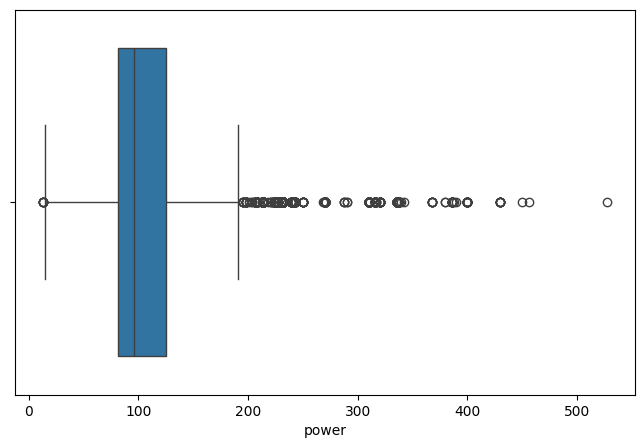

In [542]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['power']);

In [543]:
round(df['power'].describe(),2)

count    26478.00
mean       108.13
std         45.99
min         13.00
25%         81.00
50%         96.00
75%        125.00
max        527.00
Name: power, dtype: float64

In [544]:
Q1 = df.power.quantile(0.25)
Q3 = df.power.quantile(0.75)

IQR = Q3 - Q1
IQR

44.0

In [545]:
lower_lim = Q1 - IQR
upper_lim = Q3 + IQR  

lower_lim, upper_lim

(37.0, 169.0)

In [546]:
lower_lim3 = Q1 - 3 * IQR
upper_lim3= Q3 + 3 * IQR  

lower_lim3, upper_lim3

(-51.0, 257.0)

In [547]:
no_outliers= (df['power'] <= upper_lim3) & (df['power'] >= lower_lim)

In [548]:
df = df[no_outliers]

In [549]:
df.shape

(26003, 37)

# Engine Size

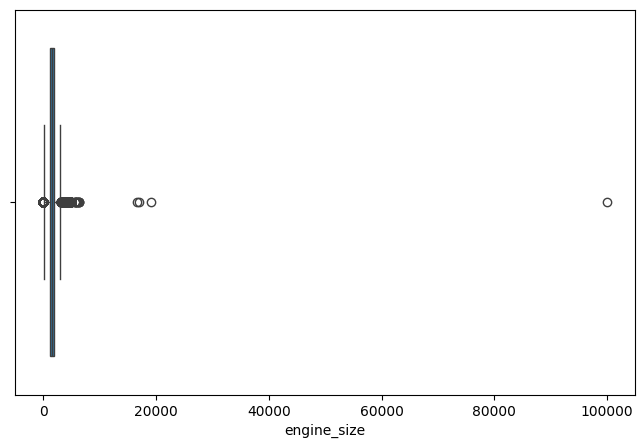

In [550]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['engine_size']);

In [551]:
round(df['engine_size'].describe(),2)

count    26003.00
mean      1619.63
std        845.74
min          0.00
25%       1242.00
50%       1580.00
75%       1969.00
max      99900.00
Name: engine_size, dtype: float64

In [552]:
df.loc[df['engine_size']>20000][['make_model','engine_size']]

,make_model,engine_size
16556,Dacia Sandero,99900


In [553]:
df.drop(16556, inplace=True)

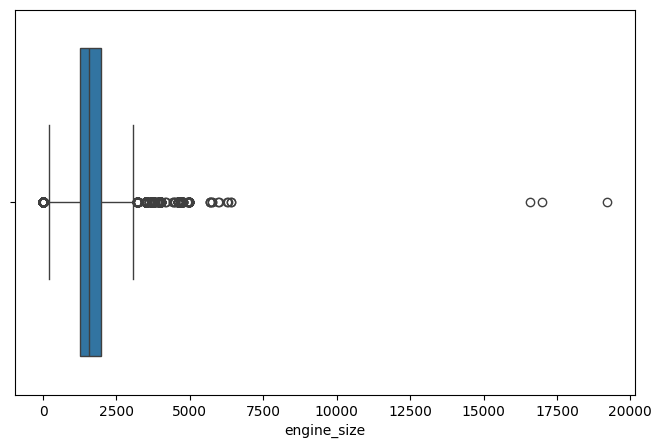

In [554]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['engine_size']);

In [555]:
Q1 = df.engine_size.quantile(0.25)
Q3 = df.engine_size.quantile(0.75)

IQR = Q3 - Q1
IQR

727.0

In [556]:
round(df['engine_size'].describe(),2)

count    26002.00
mean      1615.85
std        586.34
min          0.00
25%       1242.00
50%       1580.00
75%       1969.00
max      19194.00
Name: engine_size, dtype: float64

In [557]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 3*IQR  

lower_lim, upper_lim

(151.5, 4150.0)

In [558]:
no_outliers= (df['engine_size'] <= upper_lim) & (df['engine_size'] >= lower_lim)

In [559]:
df = df[no_outliers]

In [560]:
df.shape

(25580, 37)

# Age 

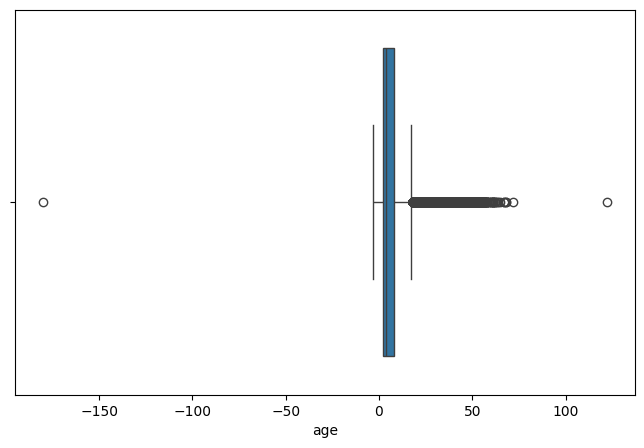

In [561]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['age']);

In [562]:
round(df['age'].describe(),2)

count    25580.00
mean         6.68
std          7.75
min       -180.00
25%          2.00
50%          4.00
75%          8.00
max        122.00
Name: age, dtype: float64

In [563]:
df.loc[df['age']<0]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
7011,Renault Clio,Renault,16990,Sedan,Used,5,0,20926.0,Manual,LPG,...,5,Cloth,0,0,FR,-180.0,2,2,1,1
9764,Fiat 500 Abarth,Fiat,17995,Compact,Used,3,0,59629.0,Manual,benzine,...,6,Cloth,0,0,NL,-3.0,1,2,1,1
19213,Nissan Micra,Nissan,3250,Convertible,Used,2,0,147985.0,Manual,benzine,...,6,Leather,0,0,NL,-1.0,1,1,1,1


In [564]:
df.drop([7011,9764, 19213], inplace=True)

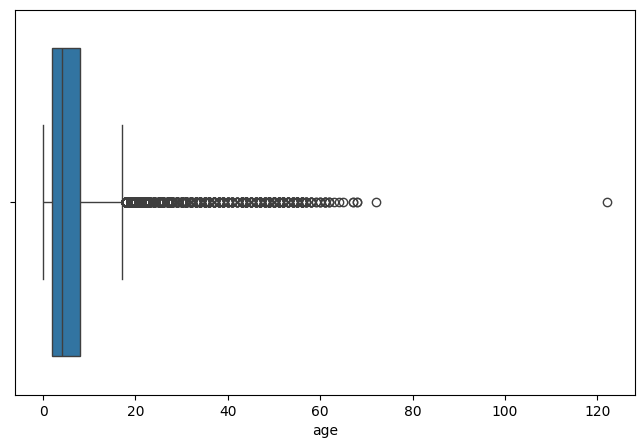

In [565]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df['age']);

In [566]:
Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

IQR = Q3 - Q1
IQR

6.0

In [567]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 4*IQR  

lower_lim, upper_lim

(-7.0, 32.0)

In [568]:
df.loc[df['age']>32][['make_model','price', 'age']]

,make_model,price,age
88,Mercedes-Benz E 300,4500,36.0
538,Mercedes-Benz SL 300,32500,35.0
556,Mercedes-Benz SL 280,33890,43.0
578,Mercedes-Benz SL 380,28490,39.0
634,Mercedes-Benz SL 300,49890,34.0
...,...,...,...
26715,Volvo 480,5400,35.0
27802,Volvo P1800,25000,49.0
28182,Volvo P1800,25000,49.0
28496,Volvo 244,7450,43.0


In [569]:
no_outliers= (df['age'] <= upper_lim) & (df['age'] >= lower_lim)

In [570]:
df = df[no_outliers]

In [571]:
df.shape

(25209, 37)

# Co Emission

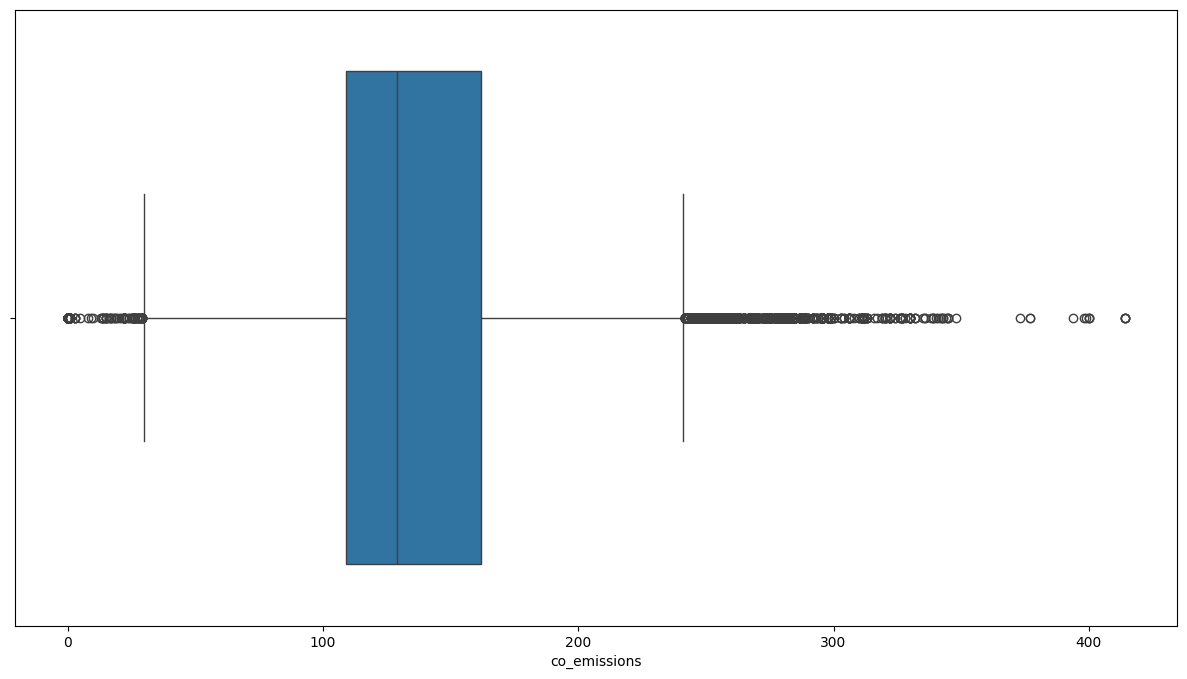

In [572]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = df['co_emissions']);

In [573]:
round(df.co_emissions.describe(),2)

count    25209.00
mean       136.11
std         57.90
min          0.00
25%        109.00
50%        129.00
75%        162.00
max        414.00
Name: co_emissions, dtype: float64

In [574]:
Q1 = df.co_emissions.quantile(0.25)
Q3 = df.co_emissions.quantile(0.75)
IQR = Q3 - Q1
IQR

53.0

In [575]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 2.5 * IQR
lower_lim, upper_lim

(29.5, 294.5)

In [576]:
no_outliers= (df['co_emissions'] <= upper_lim) & (df['co_emissions'] >= lower_lim)

In [577]:
df = df[no_outliers]

In [578]:
df.shape

(23719, 37)

# fuel consumption

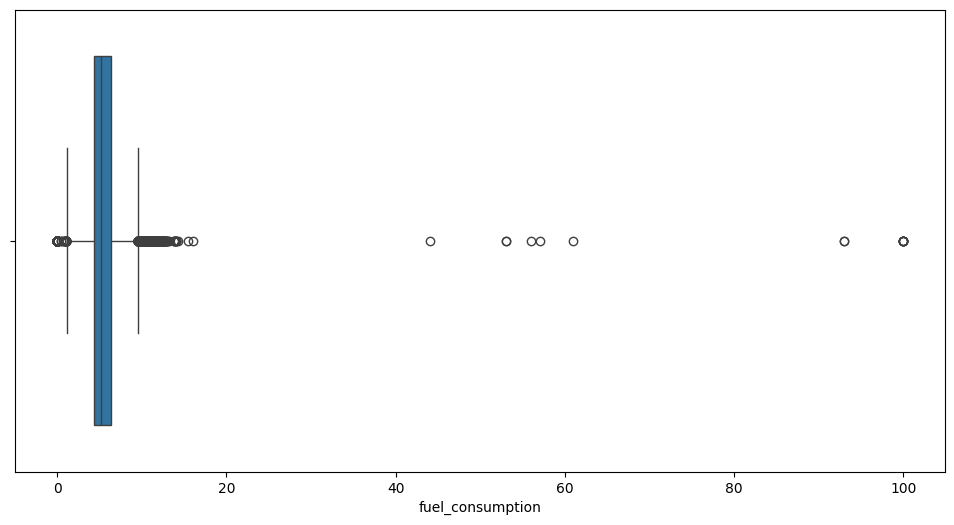

In [579]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['fuel_consumption']);

In [580]:
df.loc[df['fuel_consumption']>20][['make_model', 'fuel_consumption']]

,make_model,fuel_consumption
265,Mercedes-Benz A 180,99.9
1771,Mercedes-Benz E 200,61.0
6580,Renault Megane,57.0
18546,Toyota Yaris,56.0
18757,Nissan Qashqai,99.9
18760,Nissan Qashqai,99.9
18798,Nissan Qashqai,99.9
18799,Nissan Qashqai,99.9
19904,Nissan Qashqai,44.0
20995,Ford Focus,93.0


In [581]:
df.drop(df.loc[df['fuel_consumption']>20].index,inplace=True)

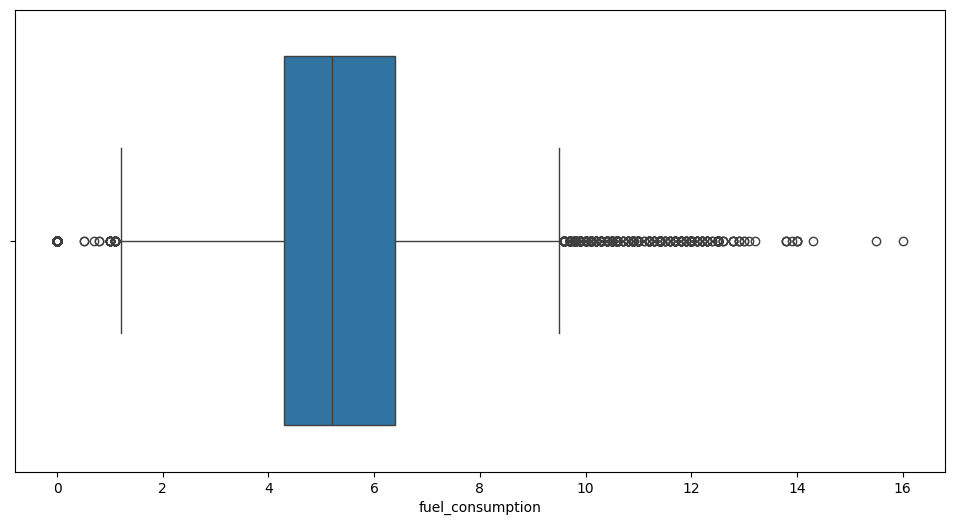

In [582]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = df['fuel_consumption']);

In [583]:
round(df['fuel_consumption'].describe(),2)

count    23704.00
mean         5.45
std          2.00
min          0.00
25%          4.30
50%          5.20
75%          6.40
max         16.00
Name: fuel_consumption, dtype: float64

In [584]:
Q1 = df.fuel_consumption.quantile(0.25)
Q3 = df.fuel_consumption.quantile(0.75)
IQR = Q3 - Q1
IQR

2.1000000000000005

In [585]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 2 * IQR
lower_lim, upper_lim

(1.149999999999999, 10.600000000000001)

In [586]:
no_outliers= (df['fuel_consumption'] <= upper_lim) & (df['fuel_consumption'] >= lower_lim)

In [587]:
df = df[no_outliers]

In [588]:
df.shape

(22588, 37)

In [589]:
df.head().T

,0,3,4,5,6
make_model,Mercedes-Benz A 160,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG,Mercedes-Benz C 160,Mercedes-Benz CLA 180
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
price,16950,46990,16800,4690,22550
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Used,Used,Used,Used
doors,5,5,5,3,5
warranty,2,1,1,0,1
mileage,120200.0,18995.0,197000.0,165000.0,83339.0
gearbox,Manual,Automatic,Automatic,Manual,Manual
fuel_type,diesel,benzine,diesel,benzine,diesel


# Final Step (Checking final situation of data via graphs)

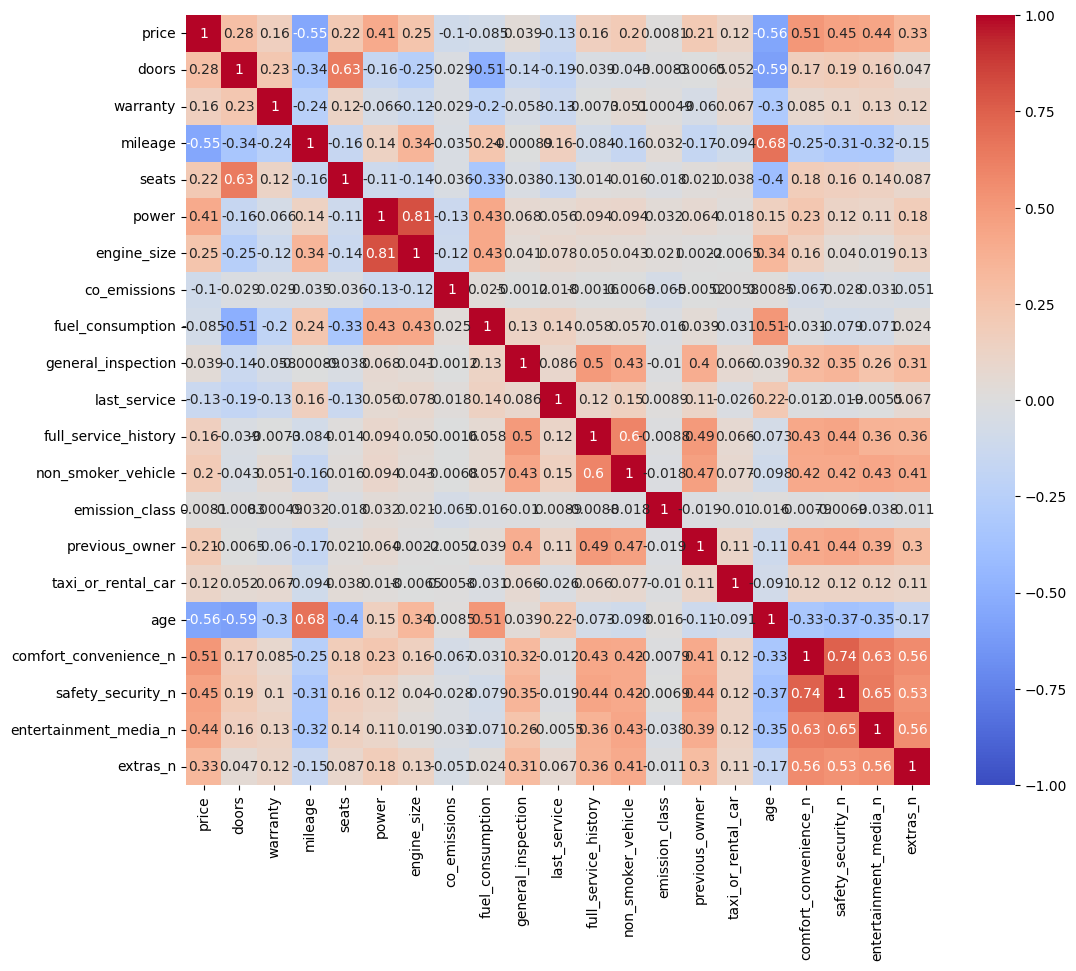

In [590]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin = -1, vmax = 1, cmap='coolwarm');

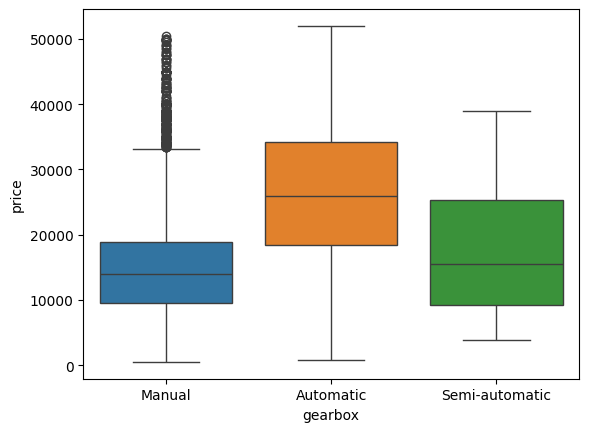

In [591]:
sns.boxplot(data = df, x = "gearbox", y = "price", hue='gearbox'); #bu bize gearbox in price i etkiledigini gösterir.

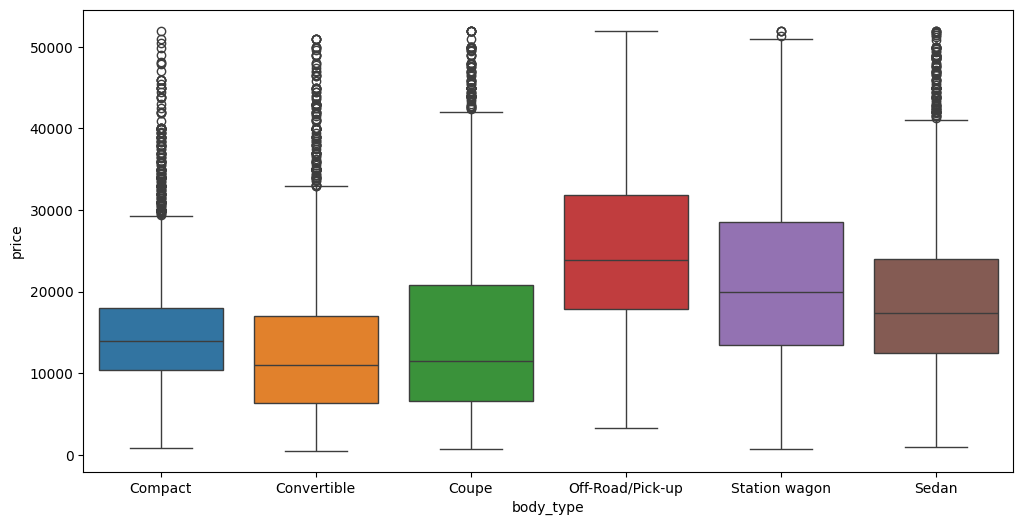

In [592]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "body_type", y = "price", hue='body_type');

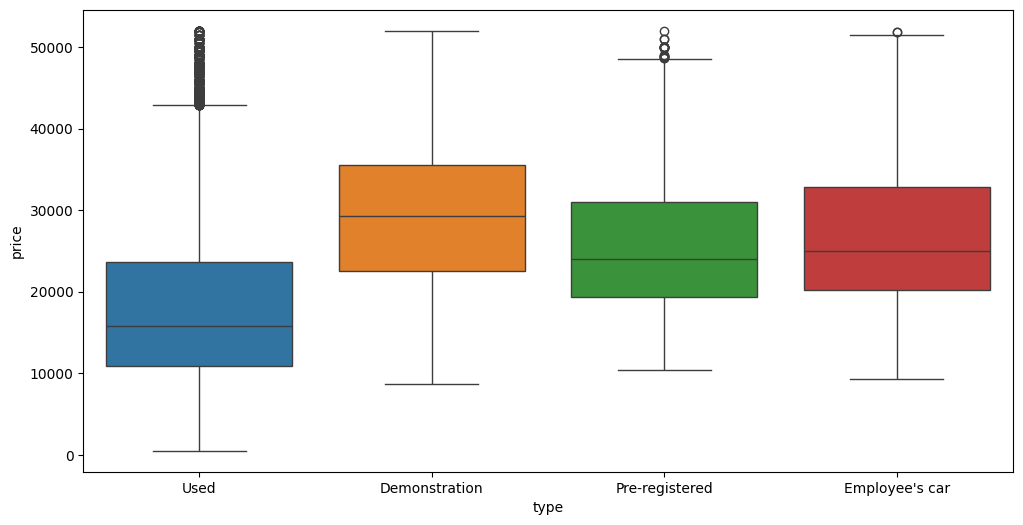

In [593]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "type", y = "price", hue='type');

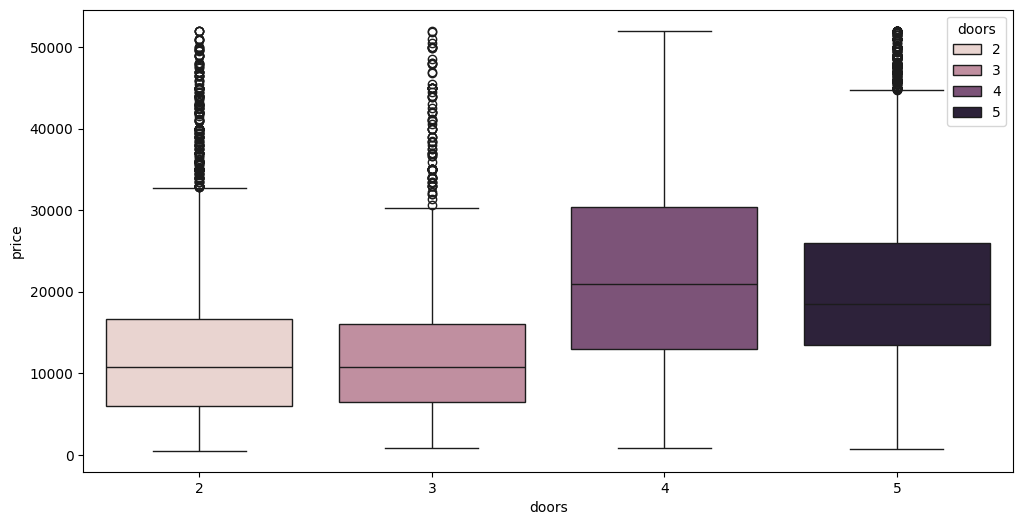

In [594]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "doors", y = "price", hue='doors');

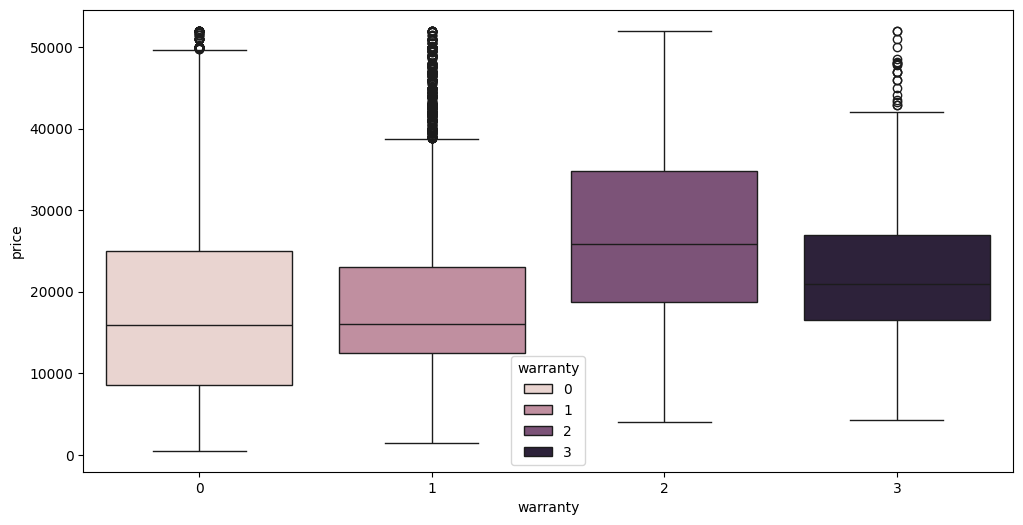

In [595]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "warranty", y = "price", hue='warranty');

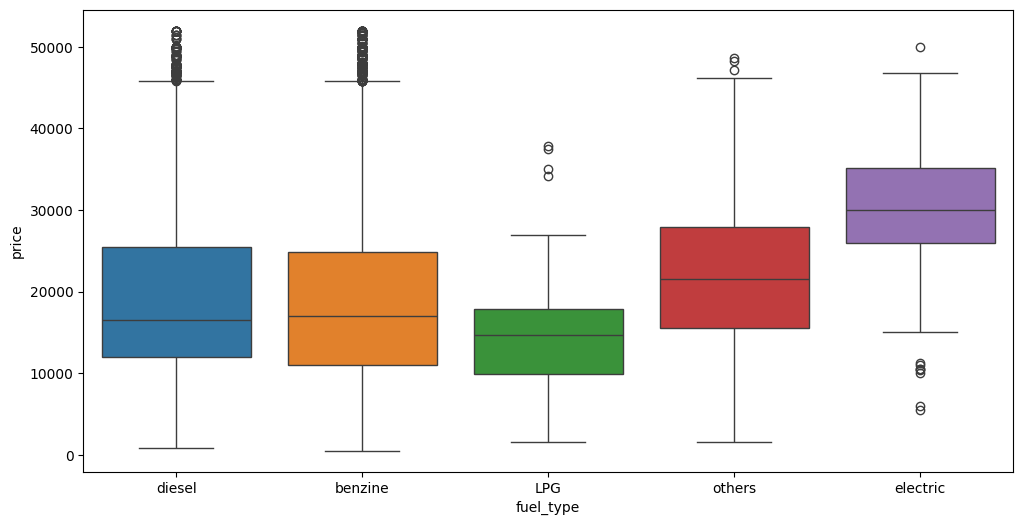

In [596]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "fuel_type", y = "price", hue='fuel_type');

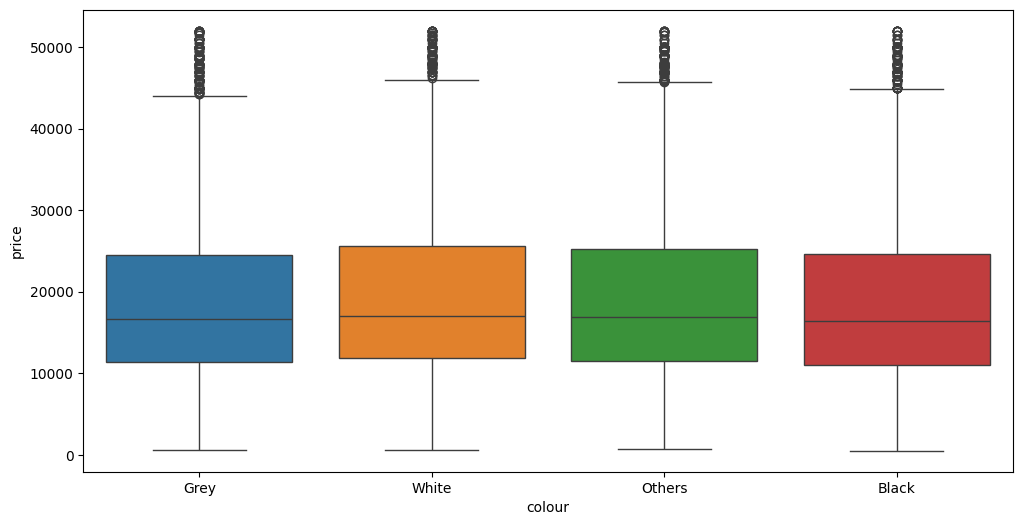

In [597]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "colour", y = "price", hue='colour');

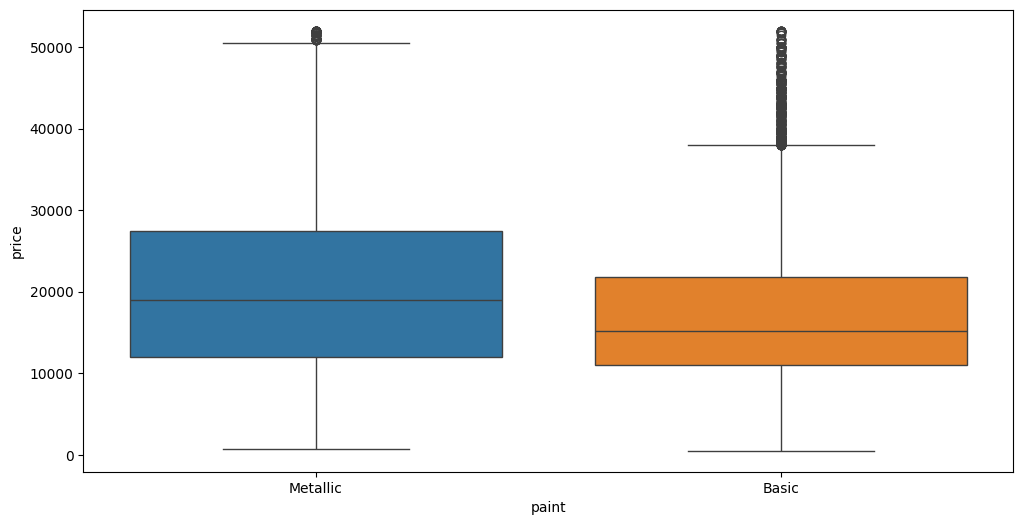

In [598]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "paint", y = "price", hue='paint');

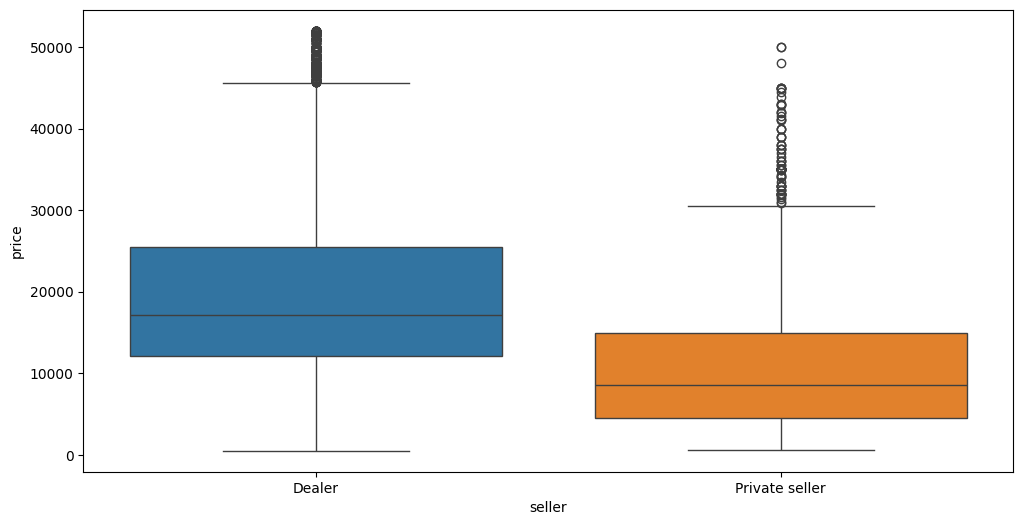

In [599]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "seller", y = "price", hue='seller');

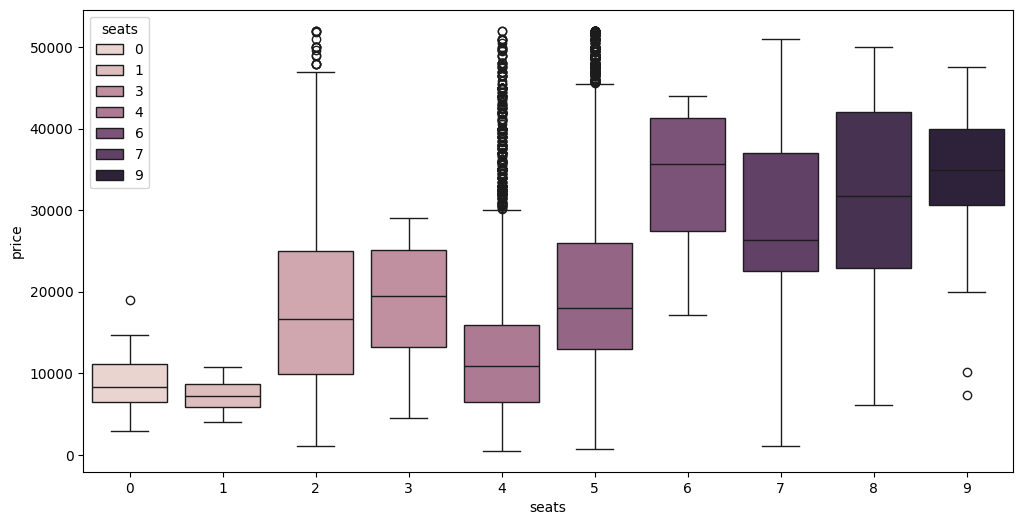

In [600]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "seats", y = "price", hue='seats');

In [601]:
df.loc[df['seats']==0]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
4866,Renault Twingo,Renault,7750,Compact,Used,5,0,53335.0,Manual,benzine,...,6,Cloth,1,0,DE,7.0,1,2,2,1
11962,SEAT Ibiza,SEAT,9900,Compact,Used,5,0,132390.0,Manual,benzine,...,6,Cloth,1,0,DE,7.0,2,2,1,1
12073,SEAT Ibiza,SEAT,14700,Compact,Used,5,0,66510.0,Manual,benzine,...,6,Cloth,0,0,DE,4.0,1,2,1,1
13472,SEAT Toledo,SEAT,7650,Sedan,Used,5,0,124800.0,Manual,benzine,...,6,Cloth,1,0,DE,8.0,1,2,2,1
13520,SEAT Ibiza,SEAT,18950,Sedan,Used,4,1,11400.0,Manual,benzine,...,5,Cloth,1,0,DE,2.0,2,2,2,2
14979,Skoda Fabia,Skoda,2900,Sedan,Used,5,0,197000.0,Manual,benzine,...,6,Cloth,1,0,DE,13.0,1,1,1,1
15105,Skoda Fabia,Skoda,2950,Sedan,Used,5,0,139877.0,Manual,benzine,...,6,Cloth,1,0,DE,14.0,1,1,1,1
24303,Hyundai i30,Hyundai,8900,Station wagon,Used,5,0,114730.0,Manual,diesel,...,6,Cloth,0,0,DE,8.0,1,2,2,1


In [602]:
df.loc[[4866,11962, 12073, 13520, 14979,15105], 'seats']=4

In [603]:
df.loc[[13472, 24303], 'seats']=5

In [604]:
df.loc[df['seats']==9]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
497,Mercedes-Benz C 250,Mercedes-Benz,34970,Convertible,Used,2,0,85002.0,Automatic,diesel,...,6,Leather,1,0,DE,5.0,2,3,2,2
4004,Opel Vivaro,Opel,29880,Station wagon,Used,4,0,31903.0,Manual,diesel,...,6,Other,1,0,DE,6.0,2,2,2,1
4023,Opel Vivaro,Opel,27870,Station wagon,Used,4,0,70994.0,Manual,diesel,...,6,Cloth,1,0,DE,6.0,1,2,1,1
4063,Opel Vivaro,Opel,47500,Station wagon,Used,4,1,18877.0,Manual,diesel,...,6,Cloth,1,0,DE,4.0,2,2,1,2
4181,Opel Vivaro,Opel,44740,Station wagon,Used,5,0,150.0,Manual,diesel,...,5,Cloth,1,0,DE,0.0,1,1,2,1
4355,Opel Vivaro,Opel,32990,Station wagon,Demonstration,4,0,46700.0,Manual,diesel,...,6,Cloth,1,0,DE,1.0,2,2,2,1
6362,Renault Trafic,Renault,30900,Station wagon,Used,4,0,42400.0,Manual,diesel,...,6,Cloth,1,0,DE,2.0,1,2,1,2
6393,Renault Trafic,Renault,33890,Station wagon,Used,4,0,27301.0,Manual,diesel,...,6,Cloth,1,0,DE,2.0,1,2,2,1
6400,Renault Trafic,Renault,30900,Station wagon,Used,4,0,46200.0,Manual,diesel,...,6,Cloth,1,0,DE,2.0,1,1,2,2
6418,Renault Trafic,Renault,34890,Station wagon,Used,4,0,18086.0,Manual,diesel,...,6,Cloth,1,0,DE,2.0,1,2,2,1


In [605]:
df.loc[df['seats']==1]

,make_model,make,price,body_type,type,doors,warranty,mileage,gearbox,fuel_type,...,emission_class,upholstery,previous_owner,taxi_or_rental_car,country,age,comfort_convenience_n,safety_security_n,entertainment_media_n,extras_n
5173,Renault,Renault,6500,Compact,Used,2,0,21400.0,Automatic,benzine,...,6,Other,1,0,IT,4.0,1,1,1,1
5816,Renault Twizy,Renault,3999,Coupe,Used,2,0,91900.0,Automatic,benzine,...,6,Cloth,1,0,DE,7.0,1,1,1,1
6205,Renault Twizy,Renault,7950,Off-Road/Pick-up,Used,2,1,35784.0,Automatic,benzine,...,6,Cloth,1,0,NL,6.0,1,2,2,1
7559,Peugeot 308,Peugeot,10750,Convertible,Used,2,1,82000.0,Manual,diesel,...,6,Leather,1,0,FR,12.0,2,2,2,1


In [606]:
df.loc[[5816, 6205,5173], 'seats']=2

In [607]:
df.loc[[7559], 'seats']=5

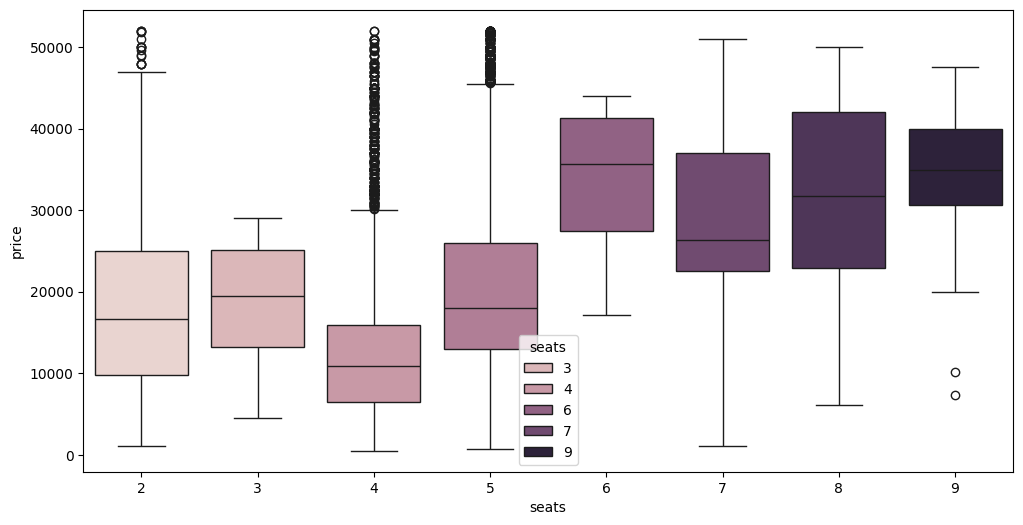

In [608]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "seats", y = "price", hue='seats');

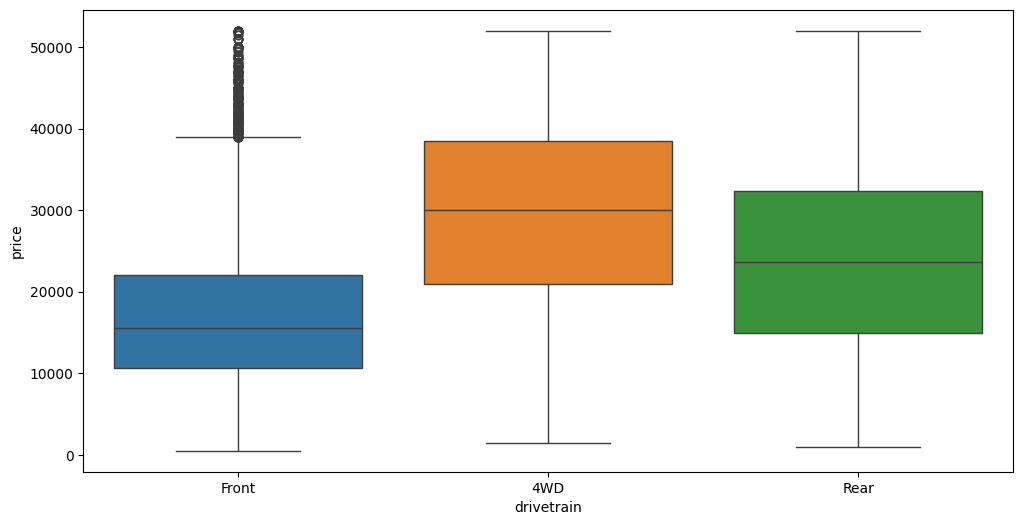

In [609]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "drivetrain", y = "price", hue='drivetrain');

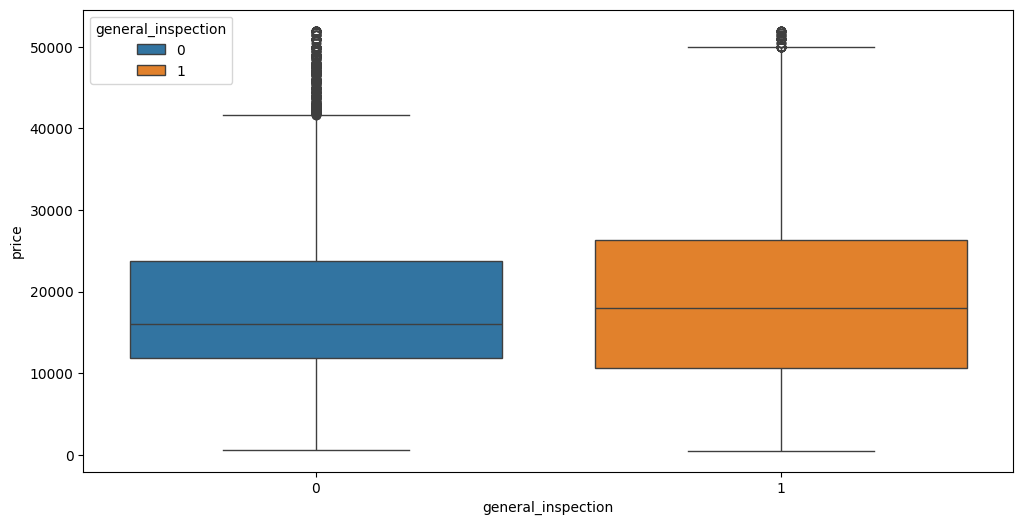

In [610]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "general_inspection", y = "price", hue='general_inspection');

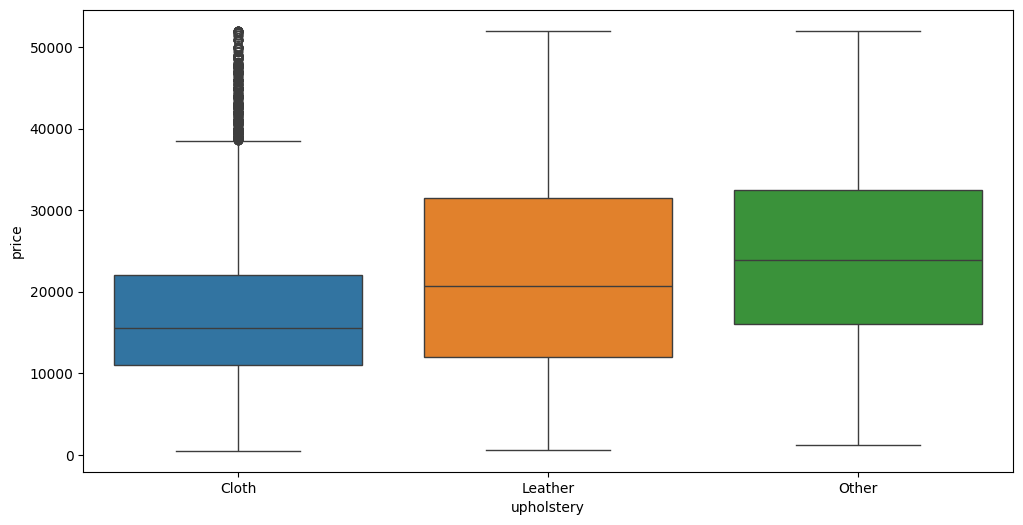

In [611]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "upholstery", y = "price", hue='upholstery');

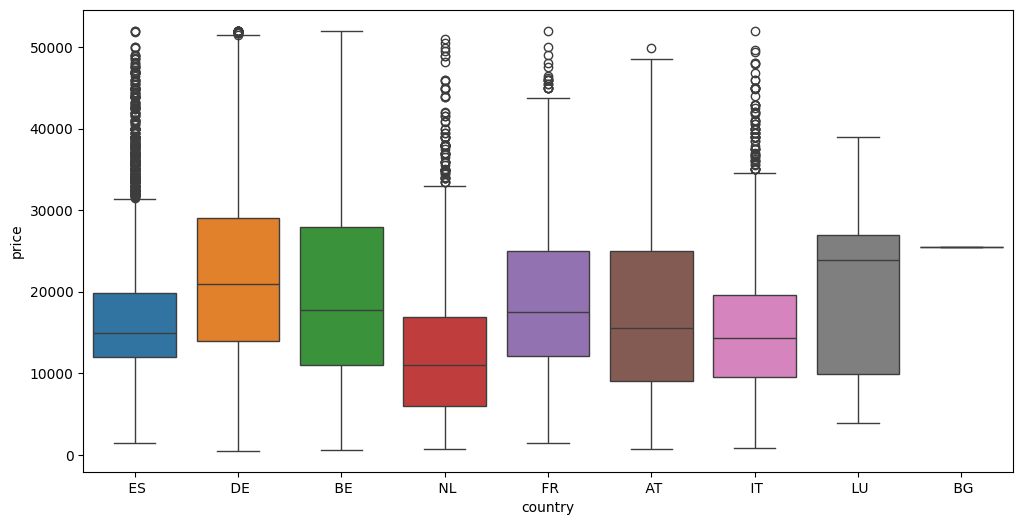

In [612]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "country", y = "price", hue='country');

In [613]:
df['make'].value_counts(dropna=False)

make
Volvo            2953
Peugeot          2136
Opel             2051
Renault          1983
Fiat             1890
Hyundai          1644
SEAT             1571
Toyota           1552
Ford             1478
Nissan           1398
Dacia            1358
Skoda            1348
Mercedes-Benz    1226
Name: count, dtype: int64

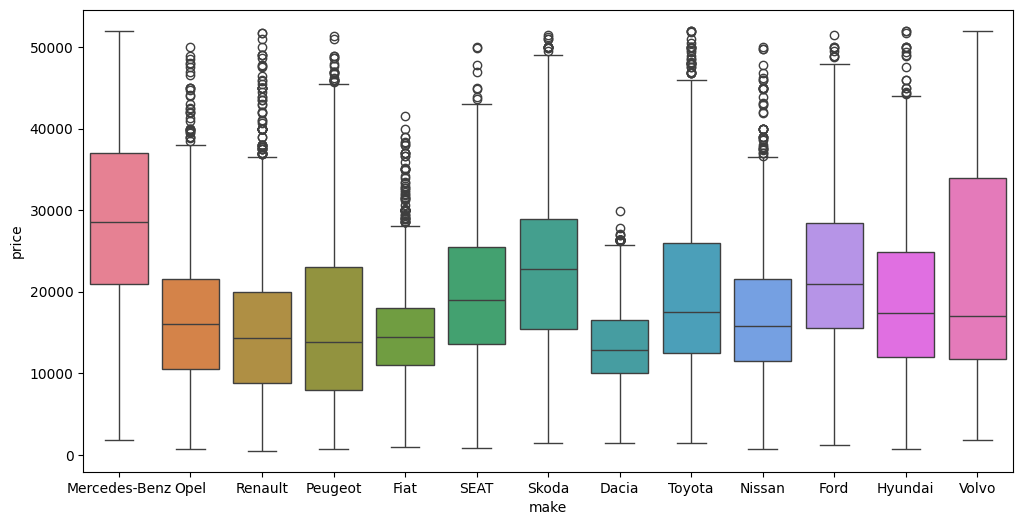

In [614]:
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x = "make", y = "price", hue='make');

In [615]:
df.drop(['colour', 'make_model', 'safety_security','safety_security_n','entertainment_media_n', 'entertainment_media', 'extras', 'extras_n', 'general_inspection', 'emission_class', 'country' ], axis=1, inplace=True)

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22588 entries, 0 to 28629
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make                   22588 non-null  object 
 1   price                  22588 non-null  int64  
 2   body_type              22588 non-null  object 
 3   type                   22588 non-null  object 
 4   doors                  22588 non-null  int64  
 5   warranty               22588 non-null  int64  
 6   mileage                22588 non-null  float64
 7   gearbox                22588 non-null  object 
 8   fuel_type              22588 non-null  object 
 9   paint                  22588 non-null  object 
 10  seller                 22588 non-null  object 
 11  seats                  22588 non-null  int64  
 12  power                  22588 non-null  int64  
 13  engine_size            22588 non-null  int64  
 14  co_emissions           22588 non-null  int64  
 15  drivetr

In [617]:
df.drop('comfort_convenience_n', axis=1, inplace=True)

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22588 entries, 0 to 28629
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   make                  22588 non-null  object 
 1   price                 22588 non-null  int64  
 2   body_type             22588 non-null  object 
 3   type                  22588 non-null  object 
 4   doors                 22588 non-null  int64  
 5   warranty              22588 non-null  int64  
 6   mileage               22588 non-null  float64
 7   gearbox               22588 non-null  object 
 8   fuel_type             22588 non-null  object 
 9   paint                 22588 non-null  object 
 10  seller                22588 non-null  object 
 11  seats                 22588 non-null  int64  
 12  power                 22588 non-null  int64  
 13  engine_size           22588 non-null  int64  
 14  co_emissions          22588 non-null  int64  
 15  drivetrain            22

In [619]:
df.to_csv("final_scout_not_dummy.csv", index=False)